In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./Car_sales (1).csv')

In [4]:
df.head(2)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.5,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778


In [5]:
df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.rename(columns={'__year_resale_value':'YearResaleValue'},inplace=True)

In [9]:
df2=df.drop(columns='Engine_size',inplace=True)

In [10]:
df.head()

,Manufacturer,Model,Sales_in_thousands,YearResaleValue,Vehicle_type,Price_in_thousands,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
3,Acura,RL,8.588,29.725,Passenger,42.00,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.95,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105


In [11]:
df.shape

(117, 15)

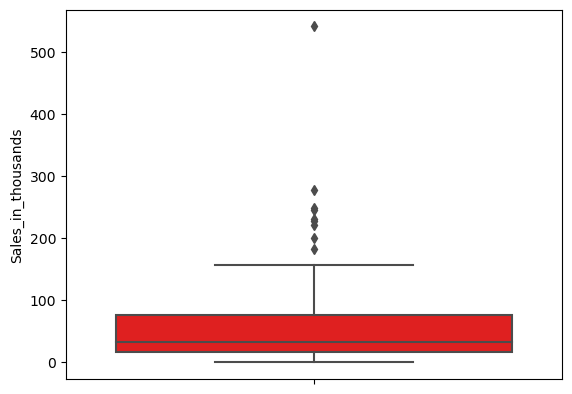

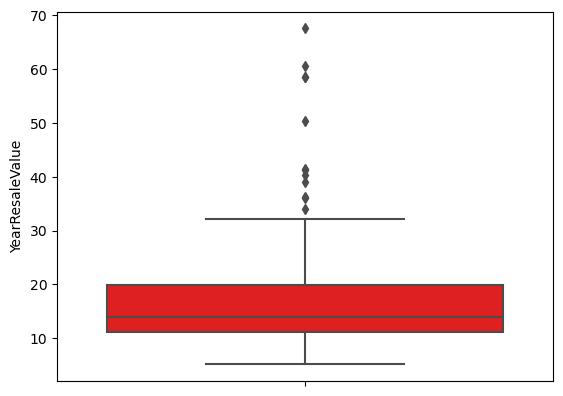

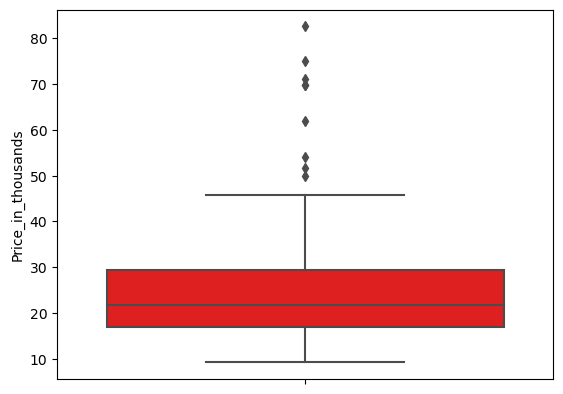

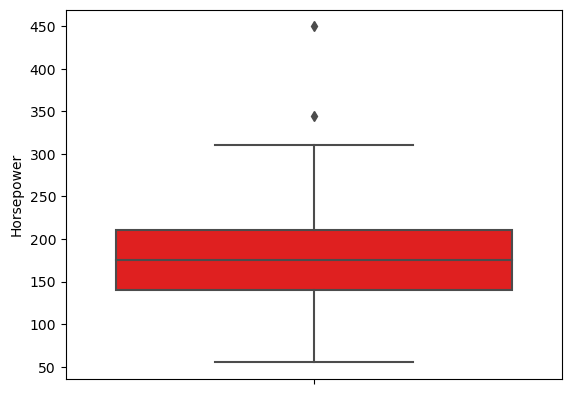

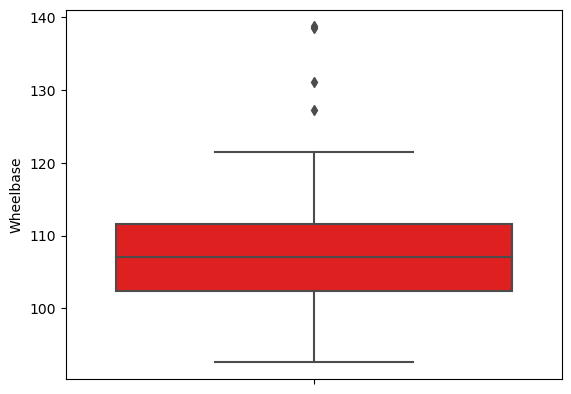

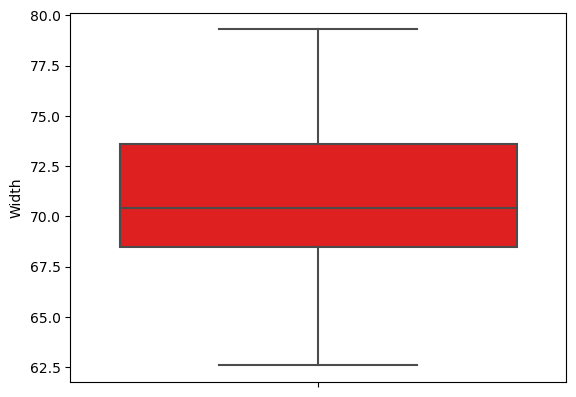

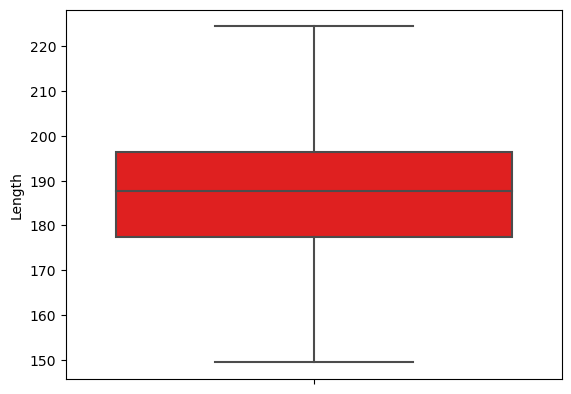

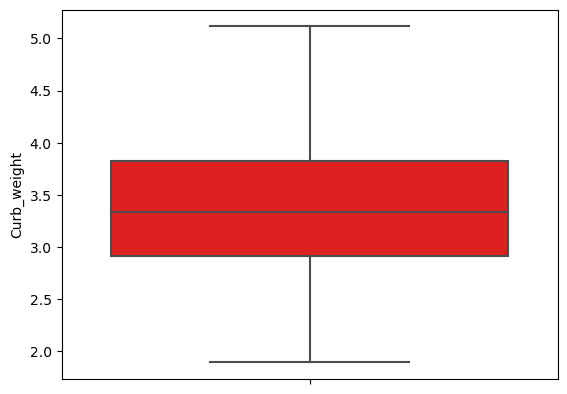

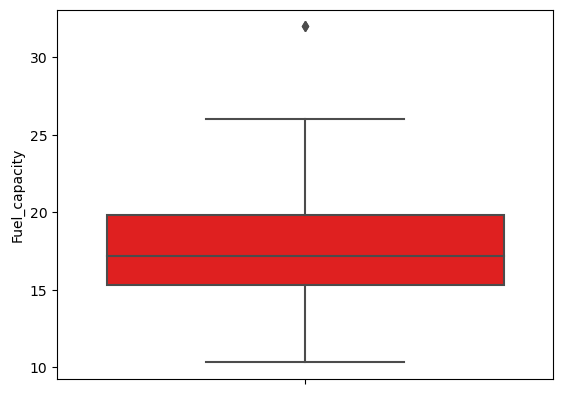

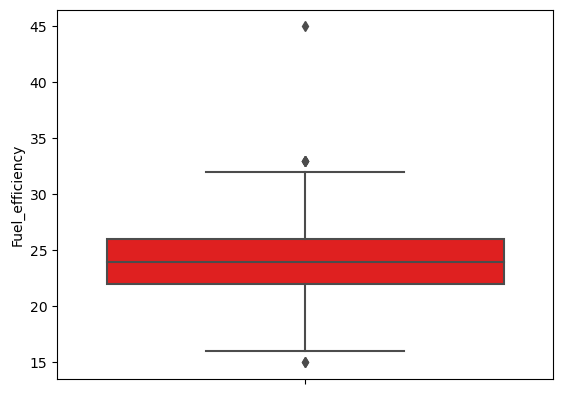

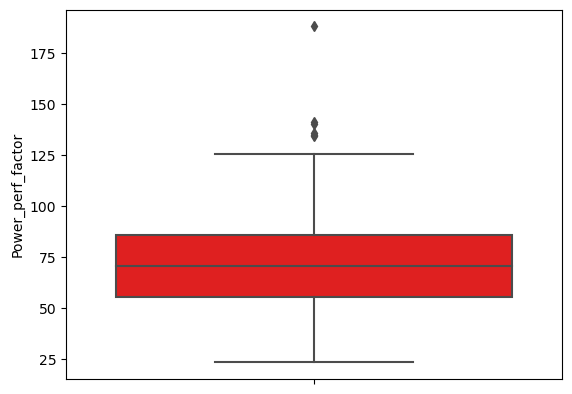

In [12]:
for i in df.columns:
    if df[i].dtypes!='object':
        sns.boxplot(y=df[i],color='Red')
        #plt.title('outliers in the column'+i)
        plt.show()

In [25]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3 - Q1
    UL = Q3 + 1.5*IQR
    LL = Q1 - 1.5*IQR
    return UL,LL

In [26]:
for i in df.columns:
    if df[i].dtypes!='object':
        UL,LL = outlier_limit(df[i])
        df[i] = np.where((df[i]>UL) |(df[i]<LL),np.nan,df[i])

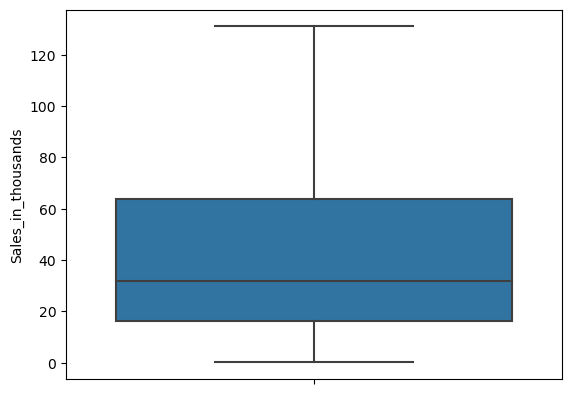

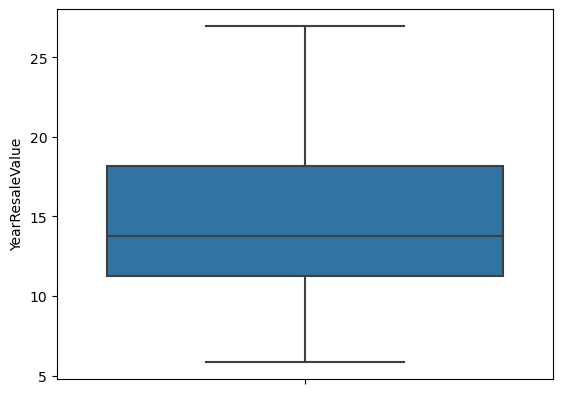

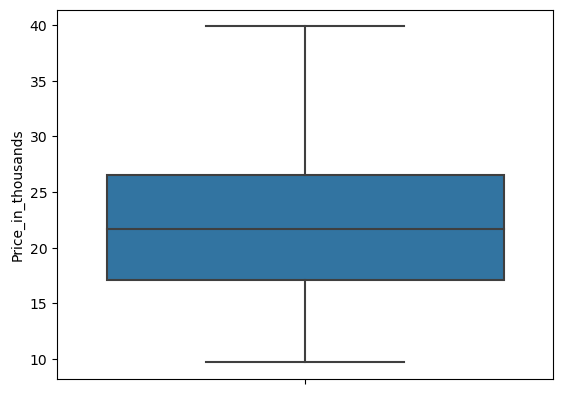

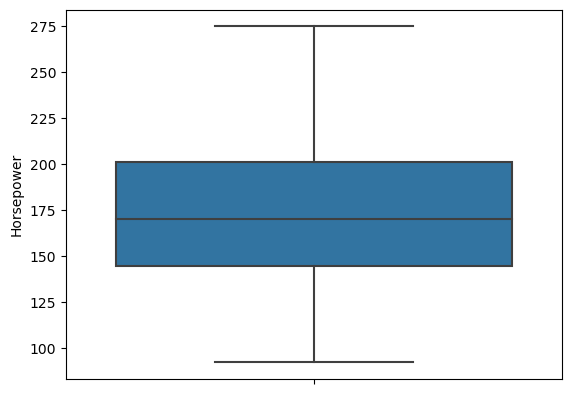

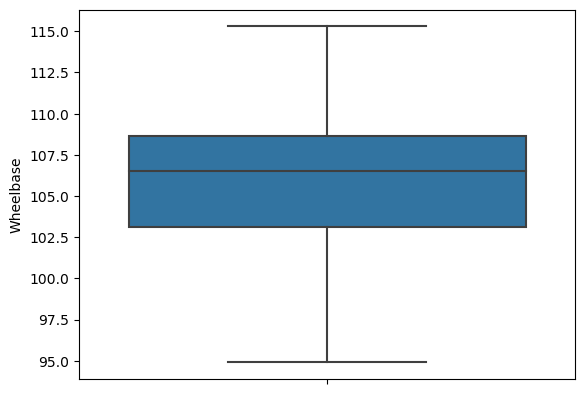

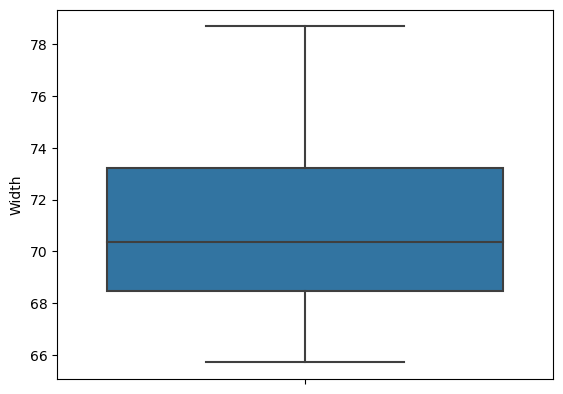

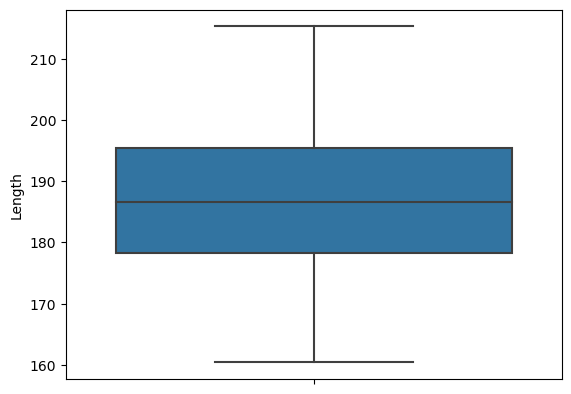

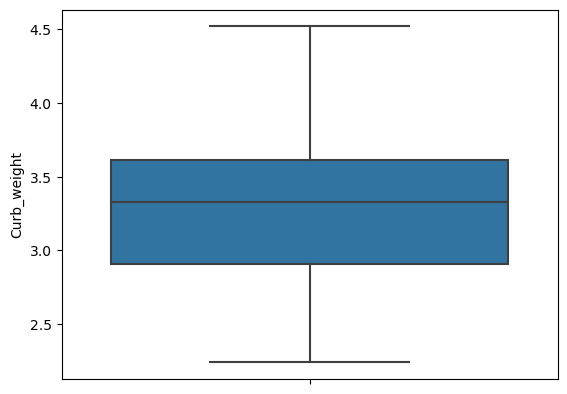

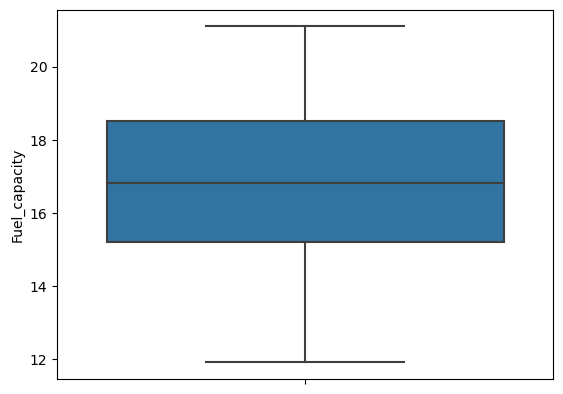

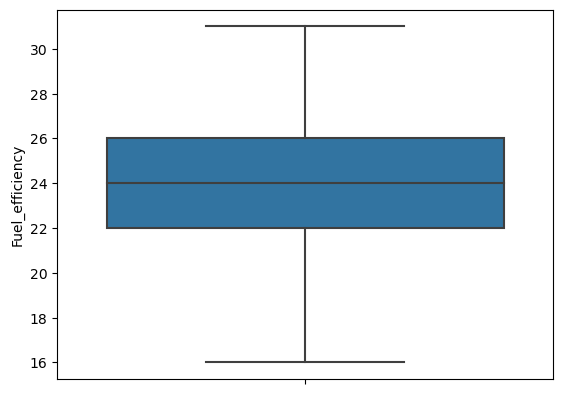

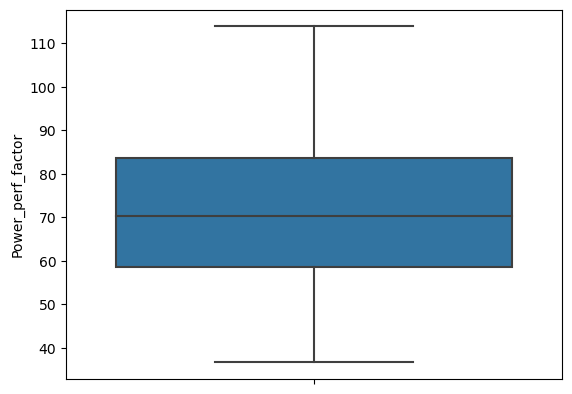

In [27]:
for i in df.columns:
    if df[i].dtypes !='object':
        sns.boxplot( y=df[i])
        plt.show()

In [28]:
df.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    4
YearResaleValue       3
Vehicle_type          0
Price_in_thousands    2
Horsepower            0
Wheelbase             6
Width                 0
Length                1
Curb_weight           1
Fuel_capacity         4
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [29]:
df.dropna(inplace=True)

In [30]:
df.shape

(75, 15)